In [107]:
from elections.Ballot import Ballot
from elections.DefaultConfigOptions import *
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h
from elections.NDPopulation import NDPopulation
from network.ElectionModel import ElectionModel


In [108]:
def create_model_and_population(ideology_bins: int, ideology_dim: int) -> (ElectionModel, NDPopulation):
    ideology_dim = 1
    ideology_bins = 32
    hidden_ratio = 4

    model = ElectionModel(21, 256, 4)

    population_means = np.zeros(shape=(ideology_dim,))
    population_stddev = np.ones(shape=(ideology_dim,))
    pop = NDPopulation(population_means, population_stddev)
    return model, pop

In [109]:
def gen_random_candidates(population: NDPopulation, n: int)-> List[Candidate]:
    candidates = []
    for i in range(n):
        ivec = population.unit_sample_voter().ideology.vec * .5
        candidates.append(Candidate(f"c-{i}", Independents, Ideology(ivec), 0))

    return candidates

def run_sample_election(model: ElectionModel, process: ElectionConstructor, population: NDPopulation, n_voters: int):
    candidates = gen_random_candidates(population, 5)
    voters = population.generate_unit_voters(n_voters)
    ballots = [Ballot(v, candidates, unit_election_config) for v in voters]
    result = process.run(ballots, set(candidates))
    winner = result.winner()
    return winner, candidates

In [110]:
import matplotlib.pyplot as plt
def plot_results(results: List[List[float]], labels: List[str]):

    nrows = 1
    ncols = 1
    fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
    fig.suptitle("Distance From Origin for Winner With Random Candidates", color="black", fontsize=22)
    fig.set_facecolor("white")

    count = 0

    axis.tick_params(axis='x', colors="black")
    axis.tick_params(axis='y', colors="black")
    axis.set_xlim([0, 2])

    axis.hist(results, bins=30, label=labels)
    axis.legend()

    plt.savefig("foo.png")

In [115]:
def run_comparison(voters: list[int]):
    model, population = create_model_and_population(21, 1)
    process = ElectionConstructor(construct_irv, "IRV")

    winners = []
    for nvoters in voters:
        ww = []
        for i in range(10000):
            w, c = run_sample_election(model, process, population, nvoters)
            ww.append(w.ideology.vec[0])
        winners.append(ww)

    return winners

In [116]:
nv_array = [100, 200, 400, 800, 1600]
labels = list(map(lambda n: f"{n}", nv_array))
winners = run_comparison([100, 200, 400, 800, 1600])

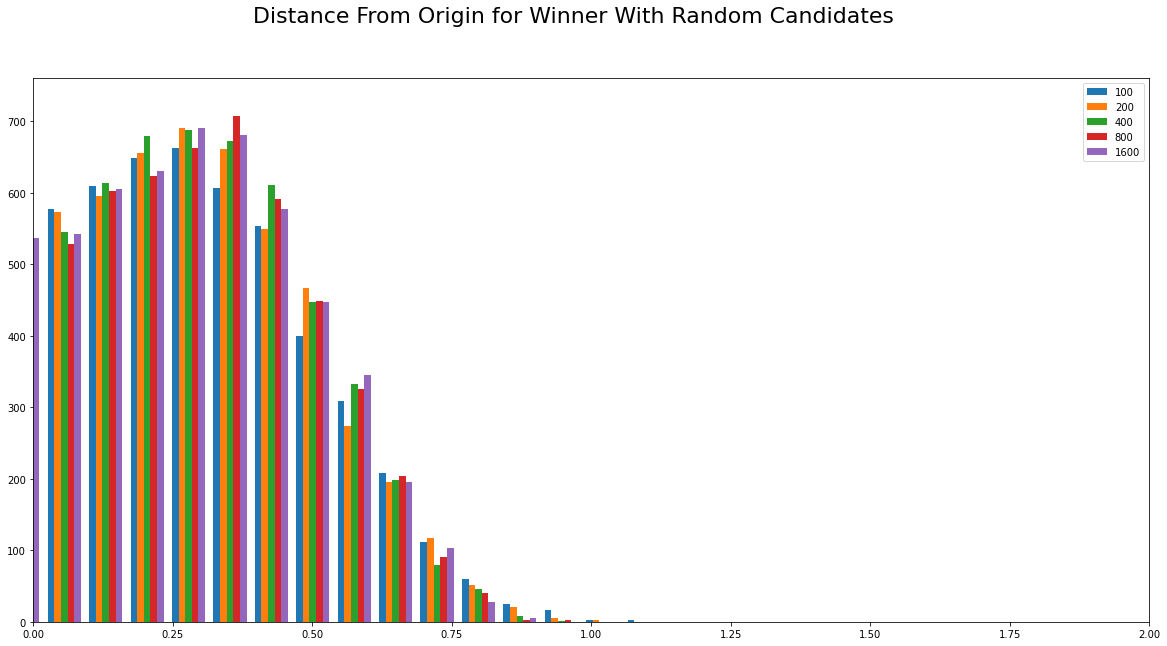

In [117]:
plot_results(winners, labels)

